# Analysis of Community Projects dataset

## Setup

### Imports as necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in required dataset

In [54]:
community_df = pd.read_csv("../Data/Community_Development_Block_Grant_Activity.csv")

In [75]:
community_df.sort_values(by='COMPLETED_DT').dropna(subset=['COMPLETED_DT'])

,X,Y,OBJECTID,ID,GRANTEE,GRANTEE_TYPE,GRANTEE_ID,IDIS_ACTV_ID,ADDRESS,CITY,STATE,ZIP,LAT,LON,GROUPING,NAME,ALIAS,ACTV_FUNDING_AMT,COMPLETED_DT,ID_CHAR
155163,-75.936404,40.341542,155164,907800151,READING,51.0,9078.0,151,"130 W Buttonwood St, ...",Reading,PA,19601,40.341542,-75.936404,Public Services,"Other Public Services Not Listed in 05A-05Y, 03T",NaN,0.00,01/01/0001,907800151
308438,-73.845508,40.909620,308439,4607001259,MOUNT VERNON,52.0,46070.0,1259,"195 W 1st St, ...",Mount Vernon,NY,10550,40.909620,-73.845508,Public Services,Crime Awareness/Prevention,NaN,0.00,01/01/1988,4607001259
113231,-73.836835,40.905073,113232,4607001120,MOUNT VERNON,52.0,46070.0,1120,"250 S 6th Ave, ...",Mount Vernon,NY,10550,40.905073,-73.836835,Public Services,Child Care Services,NaN,0.00,01/01/1989,4607001120
113421,-73.836835,40.905073,113422,4607001211,MOUNT VERNON,52.0,46070.0,1211,"250 S 6th Ave, ...",Mount Vernon,NY,10550,40.905073,-73.836835,Public Services,Child Care Services,NaN,0.00,01/01/1989,4607001211
113419,-73.841043,40.903339,113420,4607001221,MOUNT VERNON,52.0,46070.0,1221,"1 Eastchester Ln, ...",Mount Vernon,NY,10550,40.903339,-73.841043,Housing,Rehabilitation: Multi-Unit Residential,NaN,0.00,01/01/1989,4607001221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104954,-73.364721,40.738901,104955,900000000693414,Babylon Township,52.0,42024.0,1324,59 Cumberbach St,Wyandanch,NY,11798,40.738901,-73.364721,Public Services,Employment Training,NaN,5000.00,12/31/2018,900000000693414
19263,-87.682180,42.034034,19264,900000000674907,EVANSTON,51.0,17816.0,1252,903 Sherman Ave,Evanston,IL,60202,42.034034,-87.682180,Public Services,Youth Services,NaN,4000.00,12/31/2018,900000000674907
104958,-73.363851,40.748958,104959,900000000693354,Babylon Township,52.0,42024.0,1320,14 S 20th St,Wyandanch,NY,11798,40.748958,-73.363851,Public Services,Employment Training,NaN,7497.58,12/31/2018,900000000693354
221476,-121.493729,38.579750,221477,900000000686806,SACRAMENTO,51.0,31467.0,3989,1017 10th St,Sacramento,CA,95814,38.579750,-121.493729,Public Services,"Other Public Services Not Listed in 05A-05Y, 03T",NaN,83060.00,12/31/2018,900000000686806


### Description of dataset

- X : Latitude
- Y : Longitude
- OBJECTID: In ArcGIS, a system-managed value that uniquely identifies a record or feature.
- ID: In Integrated Disbursement and Information System (IDIS), a uniquely generated value that identifies the record; Numeric version of ID
- GRANTEE: CDBG Grantee Name
- GRANTEE_TYPE: Type of Grantee; state grantees (TYPE = 21), entitlement grantees (TYPE = 51, 52, 61),  Hawaiian small cities (TYPE = 77) and consortia (TYPE = 90).  Entitlement grantees can be categorized as metropolitan cities, central city (TYPE = 51), metropolitan cities, other city (TYPE = 52) and urban counties (TYPE = 61).
- GRANTEE_ID: Grantee ID associated with CDBG Grantee
- IDIS_ACTV_ID: IDIS Activity ID representing the individual activity associated with the CDBG Grantee
- ADDRESS: Street Address
- CITY: City
- STATE: State
- ZIP: ZIP Code
- LAT: Latitude (decimal)
- LON: Longitude (decimal)
- GROUPING: Type of CDBG Activity; GROUPING = 'Acquisition' , GROUPING = 'Economic Development', GROUPING = 'Housing', GROUPING = 'Public Improvements', GROUPING = 'Public Services' and GROUPING = 'Other'
- NAME: Name of Activity
- ALIAS: Alias Name
- ACTV_FUNDING_AMT: Activity Funding Amount
- COMPLETED_DT: Activity Completion Date
- ID_CHAR: In Integrated Disbursement and Information System (IDIS), a uniquely generated value that identifies the record; Character version of ID
- SHAPE: The characteristic appearance or visible form of a geographic object as represented on a map

## Section 1: Basic analysis

### First question, which states have the most (and the least) community projects?

**Top States**

In [4]:
value_counts = community_df['STATE'].value_counts()
community_df['PROJECT_COUNTS'] = community_df['STATE'].map(value_counts)
community_df['PERCENTAGE_OF_TOTAL'] = round((community_df['PROJECT_COUNTS'] / len(community_df)) * 100, 2)

**Top States** (base number)

In [5]:
community_df.groupby(['STATE'])['STATE'].count().sort_values(ascending=False).head()

STATE
CA    49935
MA    24920
NY    23350
TX    19225
NJ    18981
Name: STATE, dtype: int64

**Bottom States** (base number)

In [6]:
community_df.groupby(['STATE'])['STATE'].count().sort_values(ascending=False).tail()

STATE
NE    380
PR    353
AK    227
GU     11
VI      2
Name: STATE, dtype: int64

In [7]:
columns = ['STATE', 'PERCENTAGE_OF_TOTAL']

graphing_df = community_df[columns].drop_duplicates(keep="first").sort_values("PERCENTAGE_OF_TOTAL", ascending=False)

**Top states** (by percentage)

In [42]:
graphing_df.head()

,STATE,PERCENTAGE_OF_TOTAL
190777,CA,14.82
41570,MA,7.39
98134,NY,6.93
153943,TX,5.70
84297,NJ,5.63


**Bottom states** (by percentage)

In [43]:
graphing_df.tail()

,STATE,PERCENTAGE_OF_TOTAL
82635,NE,0.11
188719,PR,0.10
200049,AK,0.07
188995,GU,0.00
190278,VI,0.00


**Amount of projects as a percentage by state, charted**

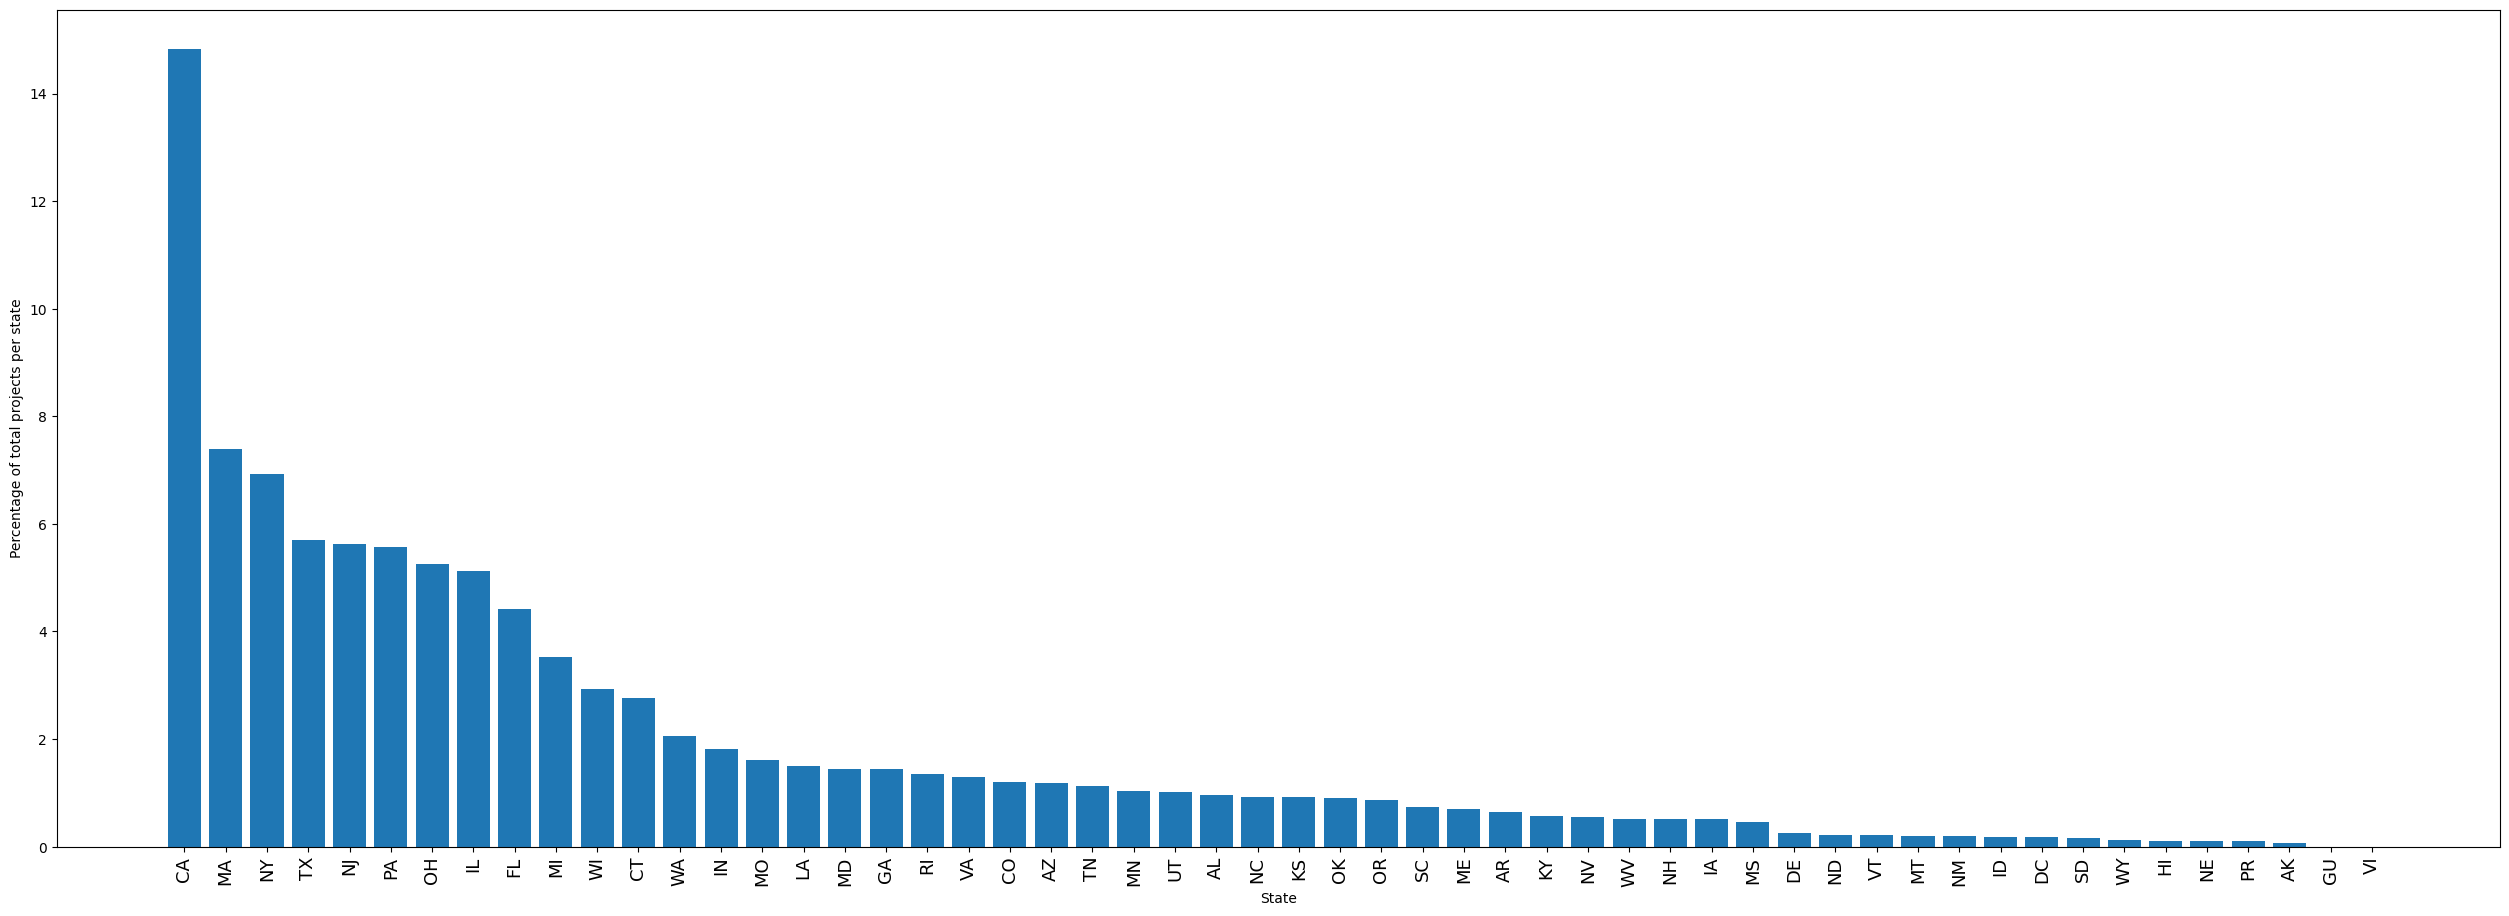

<Figure size 1500x480 with 0 Axes>

In [41]:
labels = graphing_df['STATE'].values
values = graphing_df['PERCENTAGE_OF_TOTAL'].values
plt.figure(figsize=(25,9))
plt.bar(x=labels, height=values, width=0.8)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)  # Increase the space at the bottom
plt.tight_layout()
plt.xlabel("State")
plt.ylabel("Percentage of total projects per state")
plt.tick_params(axis='x', which='major', labelsize=13)
plt.figure().set_figwidth(15)
plt.show;

### Are there any trends by type of community project?

In [45]:
community_df.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'GRANTEE', 'GRANTEE_TYPE', 'GRANTEE_ID',
       'IDIS_ACTV_ID', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'LAT', 'LON',
       'GROUPING', 'NAME', 'ALIAS', 'ACTV_FUNDING_AMT', 'COMPLETED_DT',
       'ID_CHAR', 'PROJECT_COUNTS', 'PERCENTAGE_OF_TOTAL'],
      dtype='object')

**Projects by their grouping**

In [59]:
community_df.groupby(['GROUPING'])['GROUPING'].count().sort_values(ascending=False)

GROUPING
Public Services         170546
Public Improvements      83028
Economic Development     36511
Housing                  25225
Acquisition              19275
Other                     2444
Housing Services             8
Name: GROUPING, dtype: int64

**Projects by their sub grouping**

In [60]:
community_df.groupby(['NAME'])['NAME'].count().sort_values(ascending=False)

NAME
Other Public Services Not Listed in 05A-05Y, 03T                                                 58916
Youth Services                                                                                   37390
Senior Services                                                                                  20829
Other Public Improvements Not Listed in 03A-03S                                                  20683
Clearance and Demolition                                                                         17477
                                                                                                 ...  
Asbestos Removal                                                                                    40
CDBG Assistance to Institutions of Higher Education                                                 29
Privately Owned Utilities                                                                           28
Housing Counseling, under 24 CFR 5.100, Supporting HOME Program Assi

**Does this track with spending? I.e. overall, do we spend the most on the grouping with most projects?**

In [82]:
spent_per_grouping_df = community_df.groupby(['GROUPING'])[['GROUPING', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)
spent_per_grouping_df['ACTV_FUNDING_AMT'] = spent_per_grouping_df['ACTV_FUNDING_AMT'].apply(lambda x : "${:.1f}k".format((x/1000)))
spent_per_grouping_df

/tmp/ipykernel_21726/1353937440.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spent_per_grouping_df = community_df.groupby(['GROUPING'])[['GROUPING', 'STATE', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)


,ACTV_FUNDING_AMT
GROUPING,
Public Improvements,$10370755.7k
Public Services,$5748887.9k
Economic Development,$3342848.4k
Housing,$2780741.2k
Acquisition,$998689.2k
Other,$224621.3k
Housing Services,$630.9k


This is over all states, and covers 30 years of completion as well as projects in progress. The numbers are slightly nonsensical, but the order does differ slightly. More overall was spent on Public Improvements, but there were more projects for Public Services. The magnitude is roughly 2x as many projects for Services but around 2x more expensive for Improvements.

We can examine this by state too:

For California (highest percentage of projects):

In [84]:
spent_per_grouping_df = community_df[community_df['STATE'] == 'CA'].groupby(['GROUPING'])[['GROUPING', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)
spent_per_grouping_df['ACTV_FUNDING_AMT'] = spent_per_grouping_df['ACTV_FUNDING_AMT'].apply(lambda x : "${:.1f}k".format((x/1000)))
spent_per_grouping_df

/tmp/ipykernel_21726/3251841243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spent_per_grouping_df = community_df[community_df['STATE'] == 'CA'].groupby(['GROUPING'])[['GROUPING', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)


,ACTV_FUNDING_AMT
GROUPING,
Public Improvements,$1725897.8k
Public Services,$1126143.6k
Housing,$583224.0k
Economic Development,$437556.8k
Other,$35249.9k
Acquisition,$22841.8k


For Arkansas (lowest non-zero percentage):

In [85]:
spent_per_grouping_df = community_df[community_df['STATE'] == 'AK'].groupby(['GROUPING'])[['GROUPING', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)
spent_per_grouping_df['ACTV_FUNDING_AMT'] = spent_per_grouping_df['ACTV_FUNDING_AMT'].apply(lambda x : "${:.1f}k".format((x/1000)))
spent_per_grouping_df

/tmp/ipykernel_21726/1648338060.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spent_per_grouping_df = community_df[community_df['STATE'] == 'AK'].groupby(['GROUPING'])[['GROUPING', 'ACTV_FUNDING_AMT']].sum().sort_values(by='ACTV_FUNDING_AMT', ascending=False)


,ACTV_FUNDING_AMT
GROUPING,
Public Improvements,$12664.3k
Public Services,$4160.7k
Housing,$2618.1k
Economic Development,$620.3k
Acquisition,$354.7k


## In short:
There is a large disparity between the spending on community projects between states, with California being the significant majority spender. 

Most projects were involving projects for Public Services (activity related to public services, including senior services, legal services, youth services, employment training, health services, homebuyer counseling, food banks, etc.), but most funding was actually allocated to Public Improvements (activity related to public improvements, including senior centers, youth centers, parks, street improvements, water/sewer improvements, child care centers, fire stations, health centers, non-residential historic preservation, etc). This pattern exists between the biggest spender and the smallest non-zero spender.

## If we were to evaluate environmental values, what groups best suit potential environment side-benefits?